In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd

from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split      
from sklearn.linear_model import LogisticRegression  

In [2]:
customer_df=pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv", sep=",")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
# Get the proportion of nulls in the datset.

nulls = pd.DataFrame(round(100*customer_df.isna().sum()/len(customer_df)))   #take the nulls, we sum them, and then divide to get the proportion
nulls.columns = ["nulls_prop"]
nulls = nulls.rename_axis("columns").reset_index()
nulls

,columns,nulls_prop
0,Customer,0.0
1,State,0.0
2,Customer Lifetime Value,0.0
3,Response,0.0
4,Coverage,0.0
5,Education,0.0
6,Effective To Date,0.0
7,EmploymentStatus,0.0
8,Gender,0.0
9,Income,0.0


In [6]:
# Standardize header names

data_cols=customer_df.columns
cols = [col_name.lower().replace(' ', '_') for col_name in data_cols]
cols
customer_df.columns=cols 

In [7]:
#Changing "employmentstatus" column to "employment_status"

customer_df.rename(columns={"employmentstatus": "employment_status"}, inplace=True)

In [8]:
#customer is the id, unique, so I passed it as the index
customer_df = customer_df.set_index('customer') 
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
#change ""number_of_open_complaints" and "number_of_policies" from int to string to be used as categorical.

customer_df[['number_of_open_complaints', 'number_of_policies']] = customer_df[['number_of_open_complaints', 'number_of_policies']].astype(str)

### 1. Removing Outliers

In [ ]:
#Extract numerical variables

#numerical = customer_df.select_dtypes(include = np.number)
#numerical.describe()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'customer_lifetime_value'),
  Text(1, 0, 'income'),
  Text(2, 0, 'monthly_premium_auto'),
  Text(3, 0, 'months_since_last_claim'),
  Text(4, 0, 'months_since_policy_inception'),
  Text(5, 0, 'total_claim_amount')])

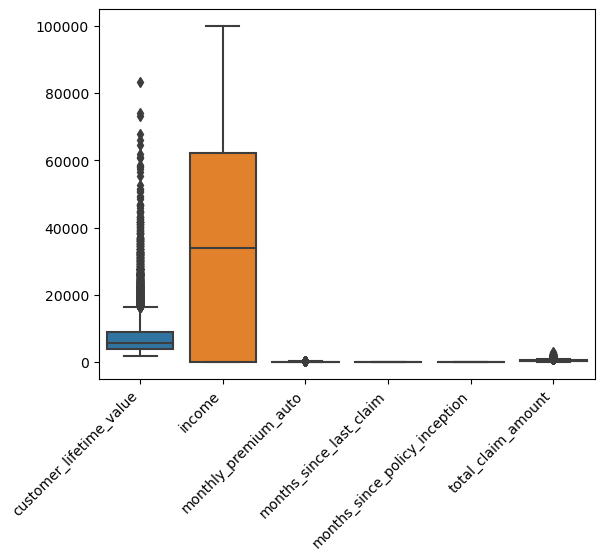

In [10]:
#checking outliers with boxplot

sns.boxplot(data=customer_df)
plt.xticks(rotation=45, ha='right')


We can see the presence of outliers in customer_lifetime_value and total_claim_amount.

<AxesSubplot:xlabel='customer_lifetime_value'>

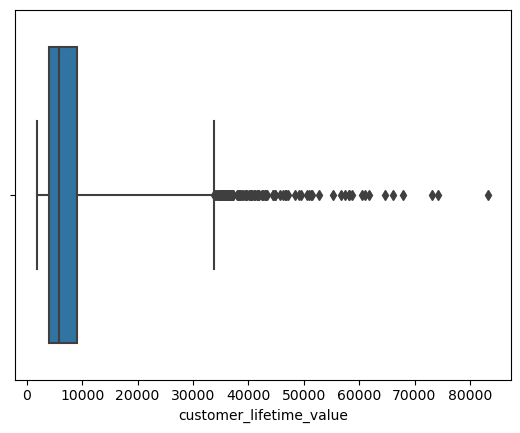

In [11]:
# Let's have a closer look at the outliers in "customer_lifetime_value" and "total_claim_amount" column.

sns.boxplot(customer_df["customer_lifetime_value"], whis=5)

<AxesSubplot:xlabel='total_claim_amount'>

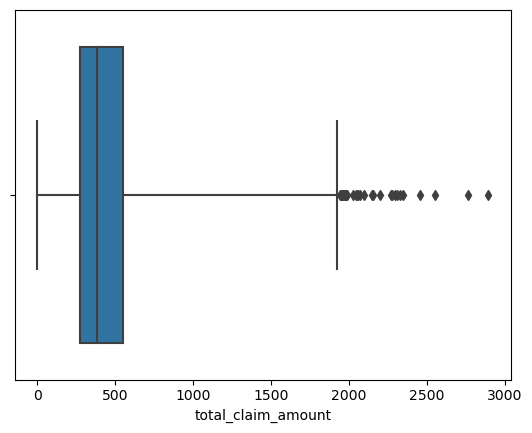

In [12]:
sns.boxplot(customer_df["total_claim_amount"], whis=5)

In [ ]:
### Remove outliers of "customer_lifetime_value" column 
# Finding IQR

#iqr = np.percentile(numerical["customer_lifetime_value"],75) - np.percentile(numerical["customer_lifetime_value"],25)
#iqr

In [ ]:
# Define the limits. Finding upper and lower limits

#upper_limit = np.percentile(numerical["customer_lifetime_value"],75) + 1.5*iqr    
#lower_limit = np.percentile(numerical["customer_lifetime_value"],25) - 1.5*iqr
#upper_limit, lower_limit

In [ ]:
# Find the outliers and remove them from the data

#numerical = numerical[(numerical["customer_lifetime_value"]>lower_limit) & (numerical['customer_lifetime_value']<upper_limit)]

In [ ]:
#sns.boxplot(numerical["customer_lifetime_value"], whis=5)

In [ ]:
### Removing outliers of "total_claim_amount" column 

#iqr = np.percentile(numerical["total_claim_amount"],75) - np.percentile(numerical["total_claim_amount"],25)
#iqr


In [ ]:
#upper_limit = np.percentile(numerical["total_claim_amount"],75) + 1.5*iqr    
#lower_limit = np.percentile(numerical["total_claim_amount"],25) - 1.5*iqr
#upper_limit, lower_limit

In [ ]:
#numerical = numerical[(numerical["total_claim_amount"]>lower_limit) & (numerical['total_claim_amount']<upper_limit)]

In [13]:
#Function to remove outliers from numerical data.

def remove_outliers(customer_df, threshold=1.5, in_columns=customer_df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(customer_df[column],75)
            lower = np.percentile(customer_df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            customer_df = customer_df[(customer_df[column]>lower_limit) & (customer_df[column]<upper_limit)]
    return customer_df

In [14]:
#creating a copy of dataframe before removing outliers

customer_df_outliers = customer_df.copy()

In [15]:
#applying the function to remove outliers

customer_df_outliers = remove_outliers(customer_df, threshold=1.5)

<AxesSubplot:xlabel='customer_lifetime_value'>

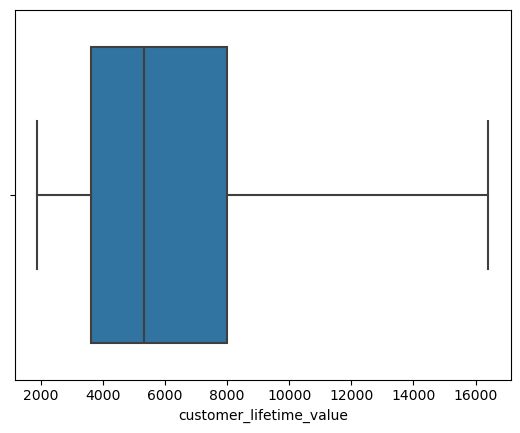

In [16]:
sns.boxplot(customer_df_outliers["customer_lifetime_value"], whis=5)

<AxesSubplot:xlabel='total_claim_amount'>

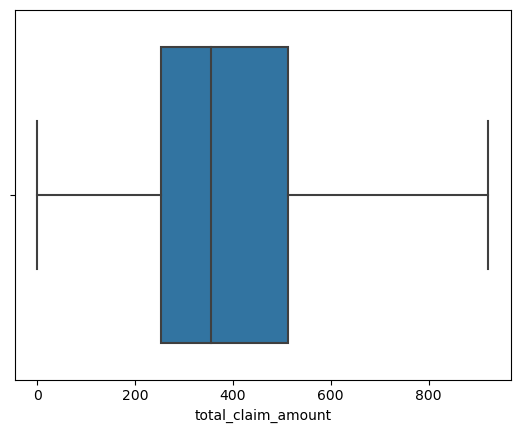

In [17]:
sns.boxplot(customer_df_outliers["total_claim_amount"], whis=5)

### 3. Create a copy of the dataframe for the data wrangling.

In [18]:
customer_df1 = customer_df_outliers.copy()
customer_df1.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize


### 3. Normalize the continuous variables. You can use any one method you want.

In [19]:
# Create a new dataframe with only the numerical variables

numerical = customer_df1.select_dtypes(np.number)
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
customer,,,,,,
BU79786,2763.519279,56274,69,32,5,384.811147
AI49188,12887.431650,48767,108,18,38,566.472247
WW63253,7645.861827,0,106,18,65,529.881344
HB64268,2813.692575,43836,73,12,44,138.130879
OC83172,8256.297800,62902,69,14,94,159.383042


In [20]:
#Using Minmax Normalization to scale data to the range of 0 and 1.

X_scale = MinMaxScaler().fit(numerical) 
x_minmax = X_scale.transform(numerical) 
x_minmax

array([[0.05965073, 0.56284694, 0.07692308, 0.91428571, 0.05050505,
        0.41715107],
       [0.75738689, 0.48776267, 0.45192308, 0.51428571, 0.38383838,
        0.61412984],
       [0.39613991, 0.        , 0.43269231, 0.51428571, 0.65656566,
        0.57445359],
       ...,
       [0.43184224, 0.        , 0.23076923, 0.25714286, 0.37373737,
        0.85735663],
       [0.38777173, 0.2194517 , 0.33653846, 0.97142857, 0.03030303,
        0.74937464],
       [0.04919683, 0.        , 0.15384615, 0.08571429, 0.90909091,
        0.40065732]])

In [21]:
#Transform array to a DataFrame

num_normalize = pd.DataFrame(x_minmax,columns=numerical.columns)
num_normalize.describe() 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
count,7789.000000,7789.000000,7789.000000,7789.000000,7789.000000,7789.000000
mean,0.288410,0.385842,0.239072,0.428516,0.484743,0.411041
std,0.214740,0.303410,0.208677,0.286206,0.281478,0.217117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.118271,0.121623,0.067308,0.171429,0.242424,0.274425
50%,0.236712,0.350177,0.163462,0.400000,0.484848,0.385043
75%,0.420958,0.629140,0.403846,0.657143,0.717172,0.556799
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4.Encode the categorical variables

In [22]:
categorical = customer_df1.select_dtypes(include=np.object)
categorical.head()

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
OC83172,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,F,Rural,Married,0,2,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize


In [23]:
categorical = categorical.drop (columns = ["effective_to_date"], axis = 1)
categorical.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
OC83172,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,0,2,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize


#### OneHotEncoder

In [24]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit_transform(categorical[["state", "marital_status", "number_of_open_complaints", "number_of_policies", "policy_type", "policy", "renew_offer_type", "sales_channel", "vehicle_class"]])

<7789x38 sparse matrix of type '<class 'numpy.float64'>'
	with 45937 stored elements in Compressed Sparse Row format>

In [25]:
#tranform array to a dataframe

encoded = encoder.transform(categorical[["state", "marital_status", "number_of_open_complaints", "number_of_policies", "policy_type", "policy", "renew_offer_type", "sales_channel", "vehicle_class"]]).toarray() 
cat_encoded = pd.DataFrame(encoded)
cat_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [26]:
# Add column names to the dataframe

cat_encoded.columns = encoder.get_feature_names_out()
cat_encoded.head()

,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,number_of_open_complaints_1,number_of_open_complaints_2,number_of_open_complaints_3,number_of_open_complaints_4,...,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


#### Ordinal Encoding

In [27]:
categorical_ordinal=categorical[["coverage", "employment_status", "location_code", "vehicle_size"]]

In [28]:
categorical_ordinal["coverage"] = categorical_ordinal["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [29]:
categorical_ordinal["employment_status"] = categorical_ordinal["employment_status"].map({"Retired" : 0, "Disabled" : 1, "Medical Leave" : 2, "Unemployed" : 3, "Employed" : 4})

In [30]:
categorical_ordinal["location_code"] = categorical_ordinal["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})

In [31]:
categorical_ordinal["vehicle_size"] = categorical_ordinal["vehicle_size"].map({"Medsize" : 0, "Small" : 1, "Large" : 2})

In [32]:
#Concatenating OneHotEncoded categoricals with Ordinal Categoricals in a single dataframe

categorical_encoded = pd.concat([cat_encoded, categorical_ordinal], axis=1) 
categorical_encoded.head()

,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,number_of_open_complaints_1,number_of_open_complaints_2,number_of_open_complaints_3,number_of_open_complaints_4,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,coverage,employment_status,location_code,vehicle_size
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN


#### 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [33]:
date=customer_df[["effective_to_date"]].copy()
date.head()

,effective_to_date
customer,
BU79786,2/24/11
QZ44356,1/31/11
AI49188,2/19/11
WW63253,1/20/11
HB64268,2/3/11


In [34]:
#First, chance effective_to_date from object to datetime so we can extract months from date.


date["effective_to_date"]=pd.to_datetime(date["effective_to_date"])

In [35]:
#Extract month   (1 = January, 2 = February)

date['effective_to_date_month'] = date['effective_to_date'].dt.month

In [36]:
#Extract day of week (Monday=0, Sunday=6)

date['effective_to_date_weekday'] = date['effective_to_date'].dt.day_of_week
date.head()

,effective_to_date,effective_to_date_month,effective_to_date_weekday
customer,,,
BU79786,2011-02-24,2,3
QZ44356,2011-01-31,1,0
AI49188,2011-02-19,2,5
WW63253,2011-01-20,1,3
HB64268,2011-02-03,2,3


In [37]:
date=date.drop("effective_to_date", axis=1)

In [38]:
date.head()

,effective_to_date_month,effective_to_date_weekday
customer,,
BU79786,2,3
QZ44356,1,0
AI49188,2,5
WW63253,1,3
HB64268,2,3


In [39]:
#CONCAT categorical_encoded + transformed date

customer_df2 = pd.concat([categorical_encoded, date], axis=1) 
customer_df2.head()


,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,number_of_open_complaints_1,number_of_open_complaints_2,number_of_open_complaints_3,number_of_open_complaints_4,...,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,coverage,employment_status,location_code,vehicle_size,effective_to_date_month,effective_to_date_weekday
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


#### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [40]:
customer_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16923 entries, 0 to LA72316
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state_California             7789 non-null   float64
 1   state_Nevada                 7789 non-null   float64
 2   state_Oregon                 7789 non-null   float64
 3   state_Washington             7789 non-null   float64
 4   marital_status_Married       7789 non-null   float64
 5   marital_status_Single        7789 non-null   float64
 6   number_of_open_complaints_1  7789 non-null   float64
 7   number_of_open_complaints_2  7789 non-null   float64
 8   number_of_open_complaints_3  7789 non-null   float64
 9   number_of_open_complaints_4  7789 non-null   float64
 10  number_of_open_complaints_5  7789 non-null   float64
 11  number_of_policies_2         7789 non-null   float64
 12  number_of_policies_3         7789 non-null   float64
 13  number_of_policies_

All columns are numerical.